In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6

# Question 1: Synthetic dataset generation, data preporcessing, & data visualisation

# Question 1.1

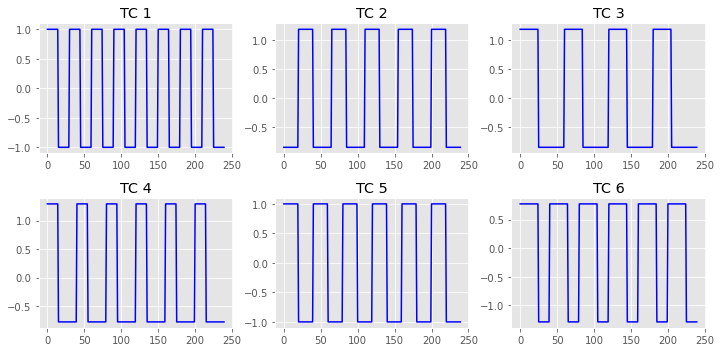

In [3]:
# Initialising vectors
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
DO = np.array([15,20,25,15,20,25])
n = 240

# Construct TC matrix
TC = np.array([([0] * AV[i] + (([1] * DO[i] + [0] * (IV[i] - DO[i])) * int(n/IV[i])))[0:n] for i in range(6)],\
              dtype = 'object')

# Standardisation
for i in range(0, 6):
    TC[i] = (TC[i] - np.mean(TC[i]))/np.std(TC[i])
    
TC = TC.astype(float)

# Plot all TC
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
x, y = (0, 0)
for i in range(0, 6):
    axs[x, y].plot(range(0, n), TC[i], color='b')
    axs[x, y].set_title("TC " + str(i + 1))
    y += 1
    if (i == 2):
        y = 0
        x += 1
    
fig.tight_layout()
plt.show()
TC = TC.transpose()

# Question 1.2

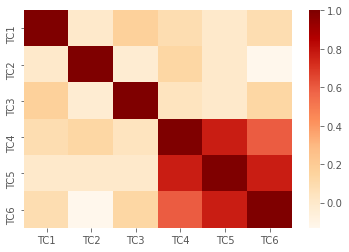

In [4]:
TC_df = pd.DataFrame(TC)
TC_df.columns = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']
corr_matrix = TC_df.corr()
sns.heatmap(corr_matrix, cmap = 'OrRd')
plt.show()

# Question 1.3

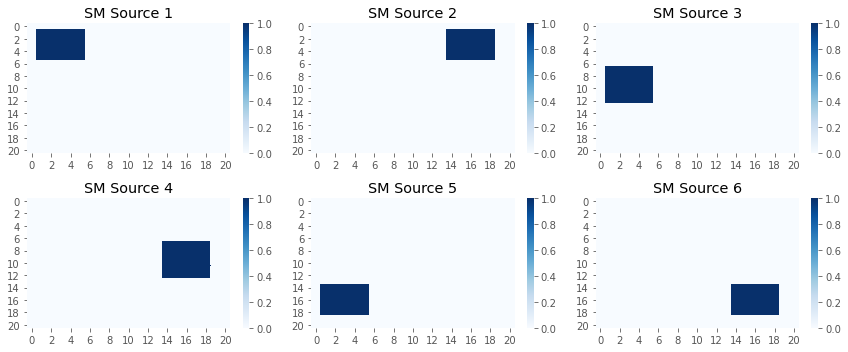

In [5]:
# Create tmpSM arrays
tmpSM1 = np.zeros((21, 21))
tmpSM2 = np.zeros((21, 21))
tmpSM3 = np.zeros((21, 21))
tmpSM4 = np.zeros((21, 21))
tmpSM5 = np.zeros((21, 21))
tmpSM6 = np.zeros((21, 21))

# Place ones
tmpSM1[1:6, 1:6] = 1
tmpSM2[1:6, 14:19] = 1
tmpSM3[7:13, 1:6] = 1
tmpSM4[7:13, 14:19] = 1
tmpSM5[14:19, 1:6] =1
tmpSM6[14:19, 14:19] = 1

tmpSM = np.array([tmpSM1, tmpSM2, tmpSM3, tmpSM4, tmpSM5, tmpSM6])

# Plotting SMs
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
x, y = (0, 0)
for i in range(0, 6):
    sns.heatmap(tmpSM[i], ax=axs[x, y], cmap = 'Blues', cbar = True)
    axs[x, y].set_title("SM Source " + str(i + 1))
    y += 1
    if (i==2):
        x += 1
        y = 0
fig.tight_layout()
plt.show()

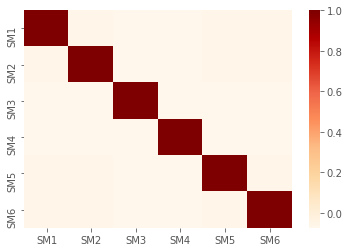

In [6]:
# Reshape tmpSM to SM
SM = np.reshape(tmpSM, (6, 441))
SM_df = pd.DataFrame(SM.transpose())
SM_df.columns = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']

# Plot correlation matrix
corr_matrix = SM_df.corr()
sns.heatmap(corr_matrix, cmap = 'OrRd')
plt.show()

# Question 1.4

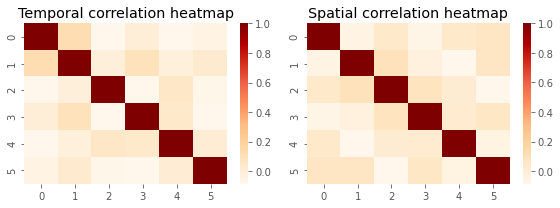

In [7]:
# Construct Gamma_t and Gamma_s
np.random.seed
Gamma_t = np.random.normal(loc = 0, scale = np.sqrt(0.25), size = (240, 6))
Gamma_s = np.random.normal(loc = 0, scale = np.sqrt(0.015), size = (6, 441))
tcorr = np.corrcoef(Gamma_t.transpose())
scorr = np.corrcoef(Gamma_s)

 
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
sns.heatmap(tcorr, cmap = "OrRd", ax=axs[0], cbar = True)
axs[0].set_title("Temporal correlation heatmap")
sns.heatmap(scorr, cmap = "OrRd", ax=axs[1], cbar = True)
axs[1].set_title("Spatial correlation heatmap")
fig.tight_layout()
plt.show()

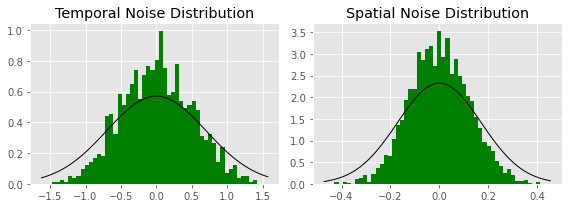

In [8]:
# Plotting histogram to check distribution

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].hist(Gamma_t.flatten(), density = True, bins=50, color='g')
axs[0].set_title("Temporal Noise Distribution")
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, np.sqrt(1.96*0.25))
axs[0].plot(x, p, 'k', linewidth=1)

axs[1].hist(Gamma_s.flatten(), density = True, bins=50, color='g')
axs[1].set_title("Spatial Noise Distribution")
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, np.sqrt(1.96*0.015))
axs[1].plot(x, p, 'k', linewidth=1)
fig.tight_layout()
plt.show()

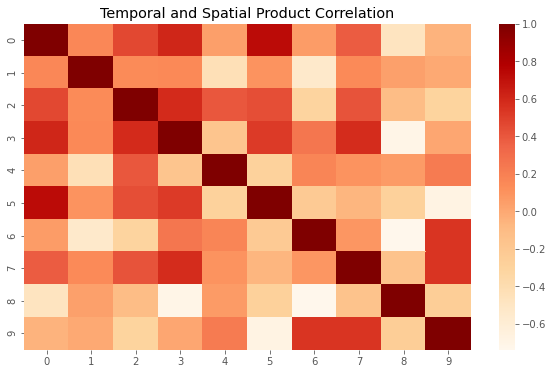

In [9]:
dot_prod = np.dot(Gamma_t, Gamma_s)
sample_col = np.random.randint(441, size=10)
corr = np.corrcoef(dot_prod.transpose()[sample_col,:])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap = "OrRd", ax=ax)
plt.title("Temporal and Spatial Product Correlation")
plt.show()

# Question 1.5

In [10]:
# Generate a synthetic dataset X
X = np.dot(np.add(TC, Gamma_t), np.add(SM, Gamma_s))
X.shape

(240, 441)

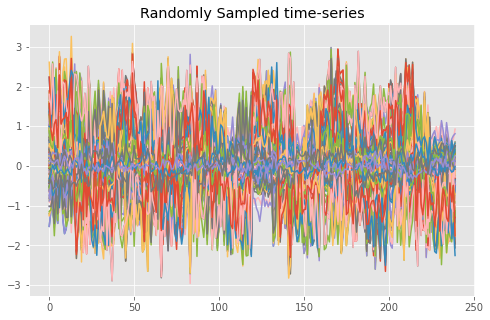

In [11]:
# Plot 200 randomly selected
samples = np.random.randint(441, size=200)
samples = X[:, samples]

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(samples)
plt.title("Randomly Sampled time-series")
plt.show()

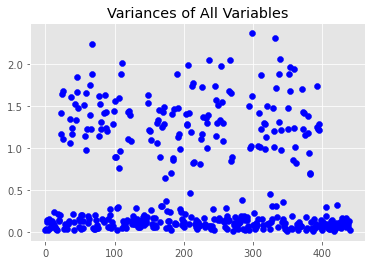

In [12]:
# Plot variance of all 441 variables
variance = np.var(X, axis = 0)
index = range(0, 441)
plt.scatter(x=index, y=variance, color='b')
plt.title("Variances of All Variables")
plt.show()

In [13]:
# Standardise the dataset X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Question 2: Data analysis, results visualization, & performance metrics

# Question 2.1

In [14]:
D = TC

# Estimate A using Least Square Estimation
DtD_i = np.linalg.inv(np.dot(D.transpose(), D))
DtX = np.dot(D.transpose(), X)
A_lsr = np.abs(np.dot(DtD_i, DtX))

# Obtain D_lsr
D_lsr = np.dot(X, A_lsr.transpose())

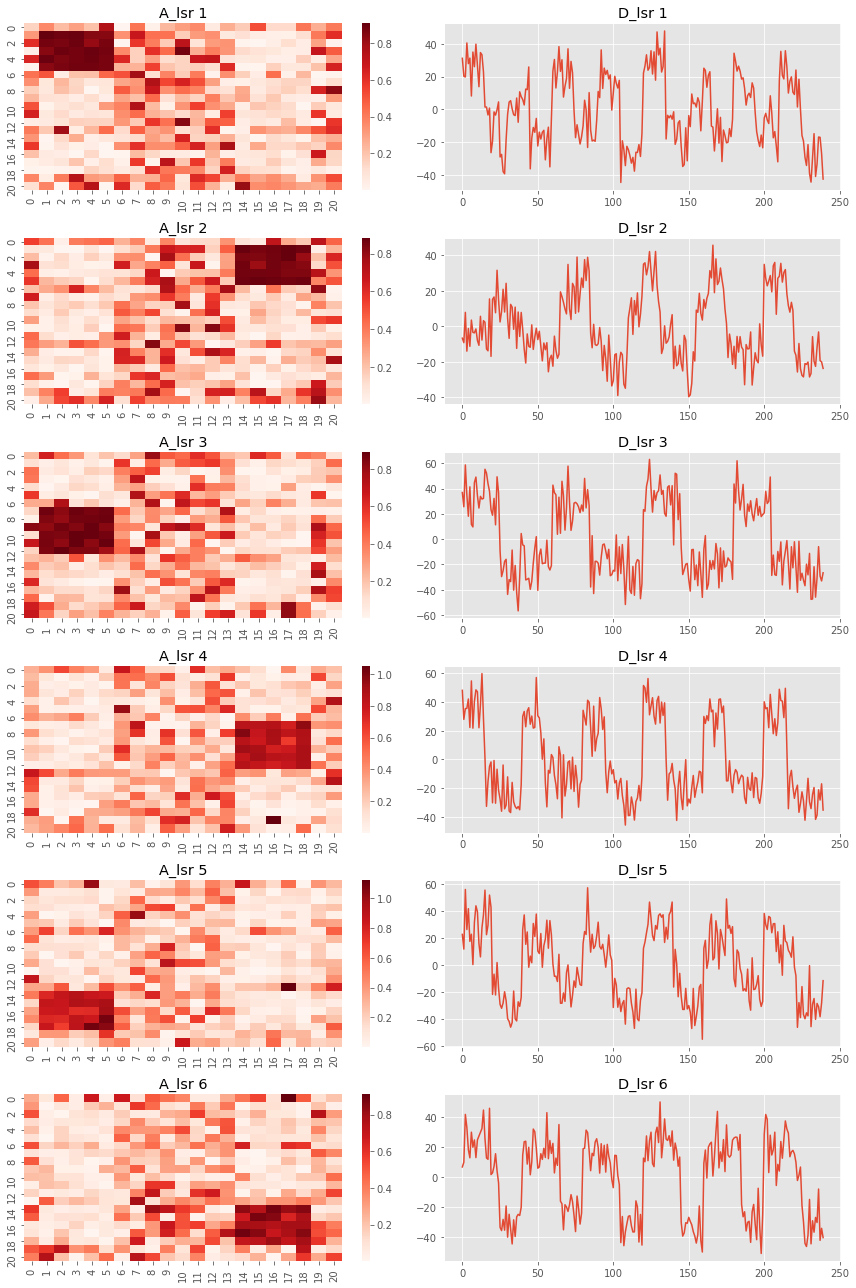

In [15]:
fig, axs = plt.subplots(6, 2, figsize=(12, 18))
x, y = (0, 0)

for i in range(0, 6):
    sns.heatmap(np.reshape(A_lsr[i], (21, 21)), ax=axs[x, y], cmap='Reds', cbar=True)
    axs[x, y].set_title("A_lsr " + str(i + 1))
    y += 1
    axs[x, y].plot(D_lsr.transpose()[i])
    axs[x, y].set_title("D_lsr " + str(i + 1))
    x += 1
    y = 0

fig.tight_layout()
plt.show()

<AxesSubplot:>

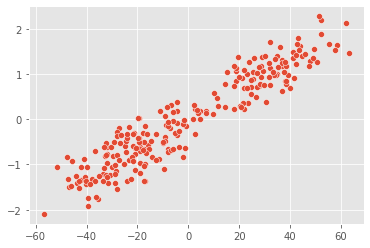

In [23]:
sns.scatterplot(x = D_lsr.T[2], y = X.T[21*9 + 2])

# Question 2.5

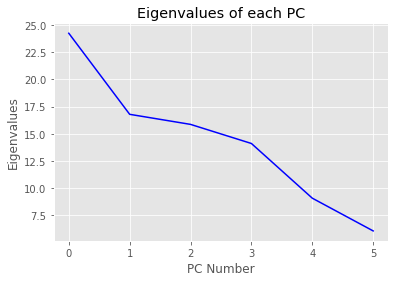

In [16]:
pc = np.linalg.svd(TC)
U, V, W = pc
plt.plot(V, color="b")
plt.xlabel("PC Number")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of each PC")
plt.show()

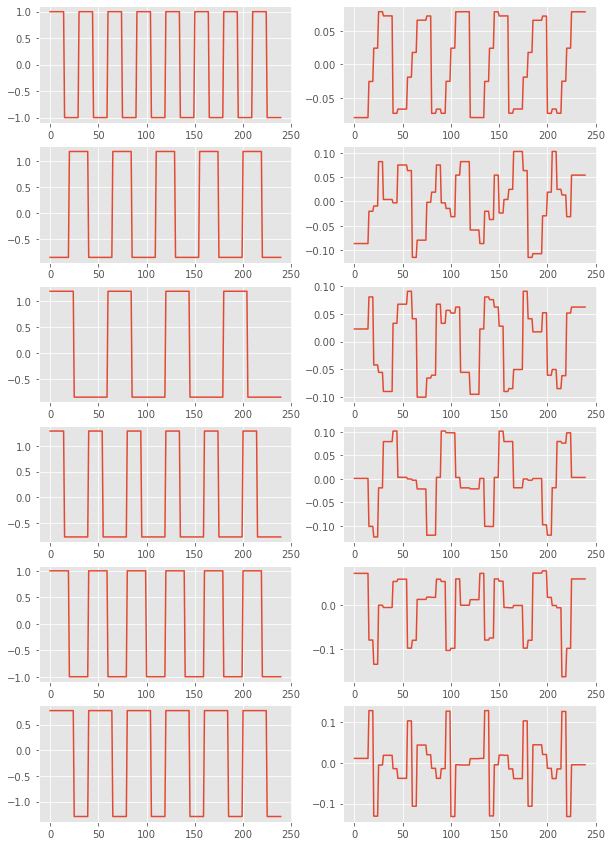

In [17]:
fig, axs = plt.subplots(6, 2, figsize=(10, 15))

for i in range(6):
    axs[i, 0].plot(TC[:,i])
    axs[i, 1].plot(U[:,i])

In [18]:
step = 1/(np.linalg.norm(TC @ TC.T) * 1.1)
thr = 0.001 * N * step
U_t = U.transpose()
Ao = np.zeros(shape=(nsrcs, 1))
A = np.zeros(shape=(nsrcs, 1))
A_pcr = np.zeros(shape=(nsrcs, x1 * x2))
m1 = U @ TC
m2 = m1.transpose()

for k in range(x1*x2):
    temp = (X[:,k].reshape(X.shape[0],) - (m1 @ Ao).reshape(X.shape[0],))
    A = Ao.reshape(Ao.shape[0],) + step*(m2 @ temp).reshape(Ao.shape[0])
    A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr)
    for i in range(10):
        Ao = A
        A = Ao + step*(np.matmul(m2, X[:,k] - np.matmul(m1, Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr))
    A_pcr[:,k] = A
A_pcr = abs(A_pcr)
D_pcr = X @ A_pcr.T

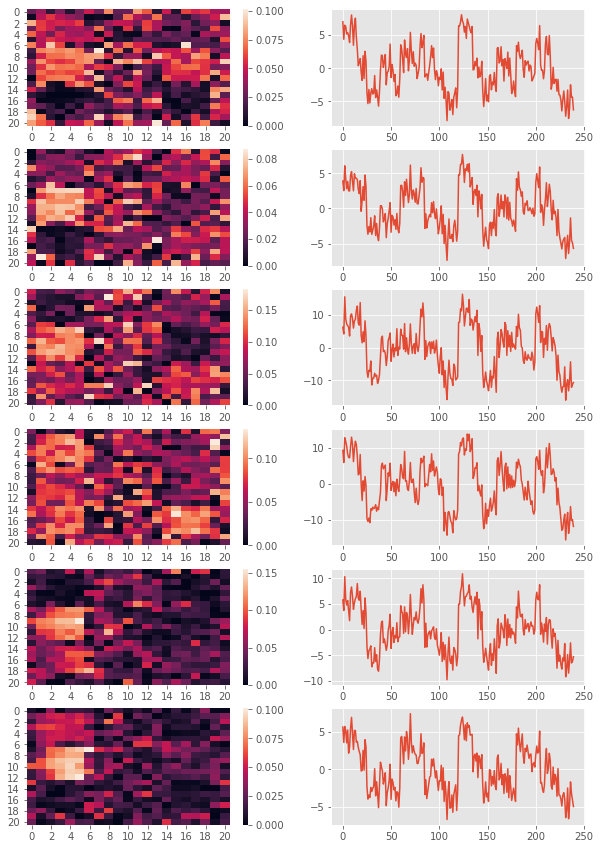

In [19]:
A_pcr_reshaped = (A_pcr.reshape(6, 21, 21))
fig,axs = plt.subplots(6, 2, figsize=(10, 15))
for i in range(6):
    sns.heatmap(A_pcr_reshaped[i,:], ax = axs[i][0])
    axs[i][1].plot(D_pcr[:,i])

In [20]:
thr = 0.001 * N * step
U_t = U.T
step = 1 / np.linalg.norm(np.matmul(TC, TC.T) * 1.1)
Ao = np.zeros(shape=(nsrcs, 1)) 
A = np.zeros(shape=(nsrcs, 1))
A_pcr = np.zeros(shape=(nsrcs, x1*x2))
m1 = U @ TC
m2 = m1.transpose()

for k in range(0,x1*x2):
    val1 = (X[:,k].reshape (X.shape[0],) - np.matmul(m1, Ao).reshape(X.shape[0],)) 
    A = Ao.reshape (Ao.shape [0],) + step*(np.matmul(m2, val1)).reshape(Ao.shape [0])
    A = (1/(1+thr))*np.sign(A)* np.maximum(np.repeat(0, nsrcs), abs (A) - thr)
    for i in range(0,10): 
        Ao = A
        A = Ao + step* (np.matmul(m2, X[:,k] - np.matmul(m1, Ao)))
        A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)- thr))
    A_pcr[:,k] = A
A_pcr_abs = abs(A_pcr) 
D_pcr = np.matmul(X, A_pcr_abs.transpose())

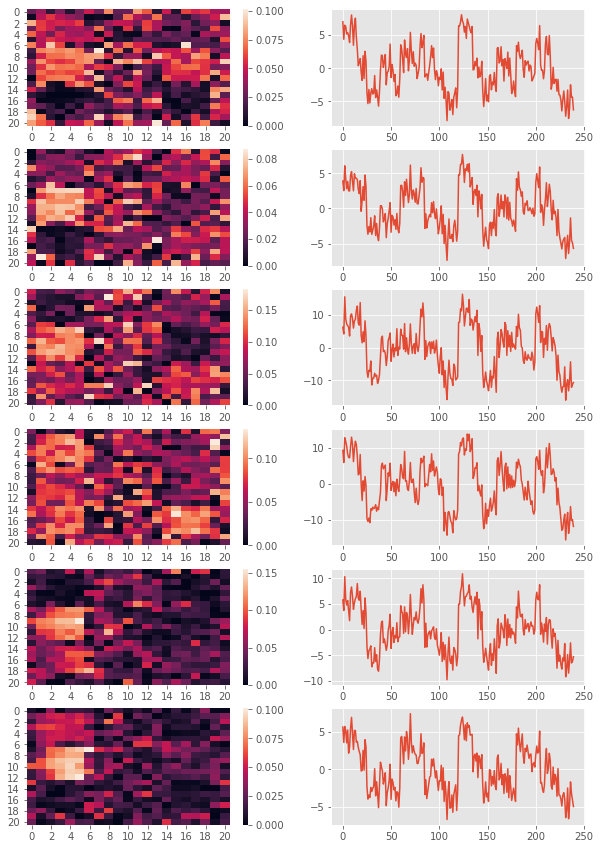

In [21]:
A_pcr_abs = (A_pcr_abs.reshape(6, 21, 21))
fig,axs = plt.subplots(6, 2, figsize=(10, 15))
for i in range(6):
    sns.heatmap(A_pcr_abs[i,:], ax = axs[i][0])
    axs[i][1].plot(D_pcr[:,i])